In [2]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"]=300
import seaborn as sns
sns.set(style="darkgrid", palette="muted", color_codes=True)

In [4]:
fa_path = "Homo_sapiens.GRCh38.107.utrs"
with open(fa_path) as f:
    seq_id = []
    seq_str = []
    for seq_block in SeqIO.parse(f,"fasta"):
        seq_id.append(seq_block.id)
        seq_str.append(str(seq_block.seq))

In [5]:
def get_names(item,idx):
    name = item.split("|")[idx]
    return name
Vget_names = np.vectorize(get_names)

def position_parse(pos_list):
    start_p = []
    end_p = []
    strand = []
    chrom = []
    
    for p in pos_list:
        items = p.split("_")
        start_p.append(items[0])
        end_p.append(items[1])
        strand.append(items[2])
        chrom.append(items[3])
    
    return start_p,end_p,strand,chrom

In [6]:
utr_type = Vget_names(seq_id,1)
trans_names = Vget_names(seq_id,2)
gene_names = Vget_names(seq_id,3)
position = Vget_names(seq_id,4)
start_p,end_p,strand,chrom = position_parse(position)

In [7]:
utr_df = pd.DataFrame({
    "UTR":utr_type,
    "seq":seq_str,
    "Transcript":trans_names,
    "Gene":gene_names,
    "Start":start_p,
    "End":end_p,
    "Strand":strand,
    "Chrom":chrom
    })

In [8]:
length = list(map(len,utr_df["seq"].values))

,UTR,seq,Transcript,Gene,Start,End,Strand,Chrom
0,five_prime_utr,CTTTCCGCCCGGCTCCTTCAGAGGCCCGGCGACCTCCAGGGCTGGG...,ENST00000524270,SPSB2,6873303,6873246,-,12
1,five_prime_utr,CTCCCTTCCAGGTCAATCCAAACTGGAGCTCAACTTTCAGAAGAGA...,ENST00000524270,SPSB2,6872997,6872902,-,12
2,three_prime_utr,GCCCTGTGATACCACAGACTGTGCTGAGGTCTTGCCACCACCCCTC...,ENST00000524270,SPSB2,6871191,6870935,-,12
3,five_prime_utr,CAGAGGCCCGGCGACCTCCAGGGCTGGGAAGTCAACCGAGGTTCGG...,ENST00000523102,SPSB2,6873285,6873215,-,12
4,five_prime_utr,GTCAATCCAAACTGGAGCTCAACTTTCAGAAGAGAAAGACGCCCCA...,ENST00000523102,SPSB2,6872986,6872902,-,12
...,...,...,...,...,...,...,...,...
374700,three_prime_utr,CCCCACCTCCGCCCGGACCCCCACAGACCTCGGGAAGGCGCTGGGC...,ENST00000397325,GALNT9,132197106,132196372,-,12
374701,five_prime_utr,CTACCTGAAAACTTTTGTTCCTATGCATAAAG,ENST00000368916,GABPB2,151088158,151088189,+,1
374702,three_prime_utr,TATGCAAGGGCCACAATTTGCACTGTGTTCATATTAATCCTCTTTT...,ENST00000368916,GABPB2,151118257,151118671,+,1
374703,five_prime_utr,GCCATTTTGTTGCCTCTGTTTCTCCACGAGGGGGGGTTAAAGGCCC...,ENST00000368918,GABPB2,151070761,151070934,+,1


In [9]:
length = list(map(len,utr_df["seq"].values))
utr_df.insert(6,"Length",length)
utr_df

,UTR,seq,Transcript,Gene,Start,End,Length,Strand,Chrom
0,five_prime_utr,CTTTCCGCCCGGCTCCTTCAGAGGCCCGGCGACCTCCAGGGCTGGG...,ENST00000524270,SPSB2,6873303,6873246,58,-,12
1,five_prime_utr,CTCCCTTCCAGGTCAATCCAAACTGGAGCTCAACTTTCAGAAGAGA...,ENST00000524270,SPSB2,6872997,6872902,96,-,12
2,three_prime_utr,GCCCTGTGATACCACAGACTGTGCTGAGGTCTTGCCACCACCCCTC...,ENST00000524270,SPSB2,6871191,6870935,257,-,12
3,five_prime_utr,CAGAGGCCCGGCGACCTCCAGGGCTGGGAAGTCAACCGAGGTTCGG...,ENST00000523102,SPSB2,6873285,6873215,71,-,12
4,five_prime_utr,GTCAATCCAAACTGGAGCTCAACTTTCAGAAGAGAAAGACGCCCCA...,ENST00000523102,SPSB2,6872986,6872902,85,-,12
...,...,...,...,...,...,...,...,...,...
374700,three_prime_utr,CCCCACCTCCGCCCGGACCCCCACAGACCTCGGGAAGGCGCTGGGC...,ENST00000397325,GALNT9,132197106,132196372,735,-,12
374701,five_prime_utr,CTACCTGAAAACTTTTGTTCCTATGCATAAAG,ENST00000368916,GABPB2,151088158,151088189,32,+,1
374702,three_prime_utr,TATGCAAGGGCCACAATTTGCACTGTGTTCATATTAATCCTCTTTT...,ENST00000368916,GABPB2,151118257,151118671,415,+,1
374703,five_prime_utr,GCCATTTTGTTGCCTCTGTTTCTCCACGAGGGGGGGTTAAAGGCCC...,ENST00000368918,GABPB2,151070761,151070934,174,+,1


In [78]:
np.unique(utr_df["Chrom"].values)

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9',
       'GL000009.2', 'GL000194.1', 'GL000195.1', 'GL000213.1',
       'GL000218.1', 'KI270711.1', 'KI270713.1', 'KI270721.1',
       'KI270727.1', 'KI270728.1', 'KI270731.1', 'KI270734.1', 'X', 'Y'],
      dtype=object)

In [10]:
utr_df.to_csv("homo_sapience_utr.csv")

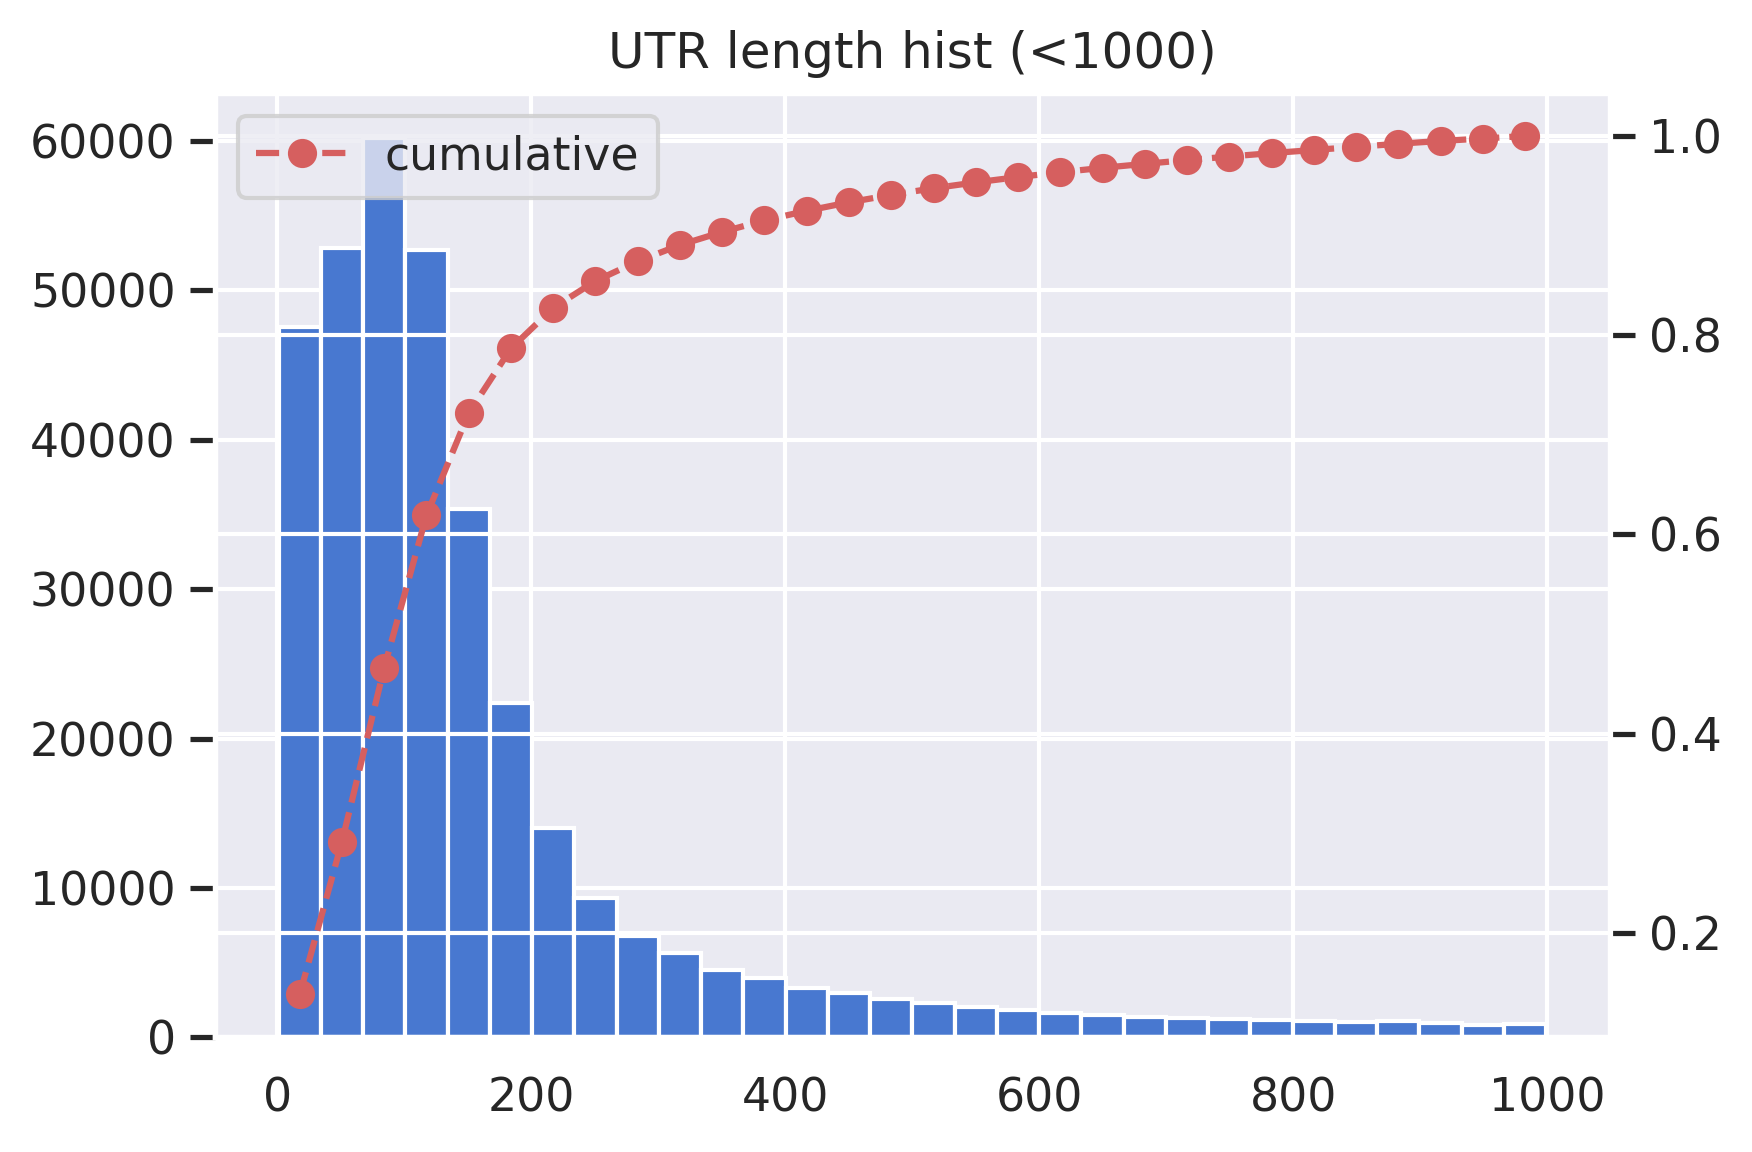

In [77]:
fig,ax1 = plt.subplots()
utr_short = utr_df[utr_df["Length"]<1000]
maxlen = utr_df["Length"].max()
minlen = utr_df["Length"].min()
mean = utr_df["Length"].mean()
ax1.set_title("UTR length hist (<1000)")
n,bins,patches = plt.hist(utr_short["Length"].values,bins=30)

y2 = np.add.accumulate(n) / n.sum()
x2 = np.convolve(bins, np.ones(2) / 2, mode="same")[1:]

ax2 = ax1.twinx()
lines = ax2.plot(x2,y2,ls="--",color="r",marker="o",label="cumulative")
#plt.text(800,50000,f"min={minlen}\nmax={maxlen}\nmean={mean:.2f}")
plt.legend()
plt.tight_layout()
plt.savefig("UTR_length_hist_under1000_cum",facecolor="white")
plt.show()
#ax.set_xscale("log")

In [30]:
utr_df["Length"]

0           58
1           96
2          257
3           71
4           85
          ... 
374700     735
374701      32
374702     415
374703     174
374704    7286
Name: Length, Length: 374705, dtype: int64

In [29]:
utr_df.describe()

,Length
count,374705.000000
mean,349.158450
std,846.793275
min,1.000000
25%,64.000000
50%,117.000000
75%,222.000000
max,32870.000000


In [3]:
utr_df = pd.read_csv("homo_sapience_utr.csv",index_col=0)

In [10]:
fives = utr_df[utr_df["UTR"]=="five_prime_utr"]
three = utr_df[utr_df["UTR"]=="three_prime_utr"]

In [7]:
fives.describe()

,Start,End,Length
count,1.715040e+05,1.715040e+05,171504.000000
mean,7.468500e+07,7.468500e+07,126.413320
std,5.561332e+07,5.561332e+07,170.705184
min,2.585000e+03,2.675000e+03,1.000000
25%,3.247525e+07,3.247539e+07,40.000000
50%,6.039648e+07,6.039658e+07,85.000000
75%,1.089635e+08,1.089634e+08,152.000000
max,2.489173e+08,2.489173e+08,6566.000000


In [11]:
three.describe()

,Start,End,Length
count,2.032010e+05,2.032010e+05,203201.000000
mean,7.568250e+07,7.568251e+07,537.157922
std,5.485557e+07,5.485558e+07,1104.741132
min,6.126000e+03,4.612000e+03,1.000000
25%,3.373197e+07,3.373206e+07,90.000000
50%,6.474016e+07,6.474001e+07,147.000000
75%,1.097621e+08,1.097622e+08,417.000000
max,2.489184e+08,2.489199e+08,32870.000000


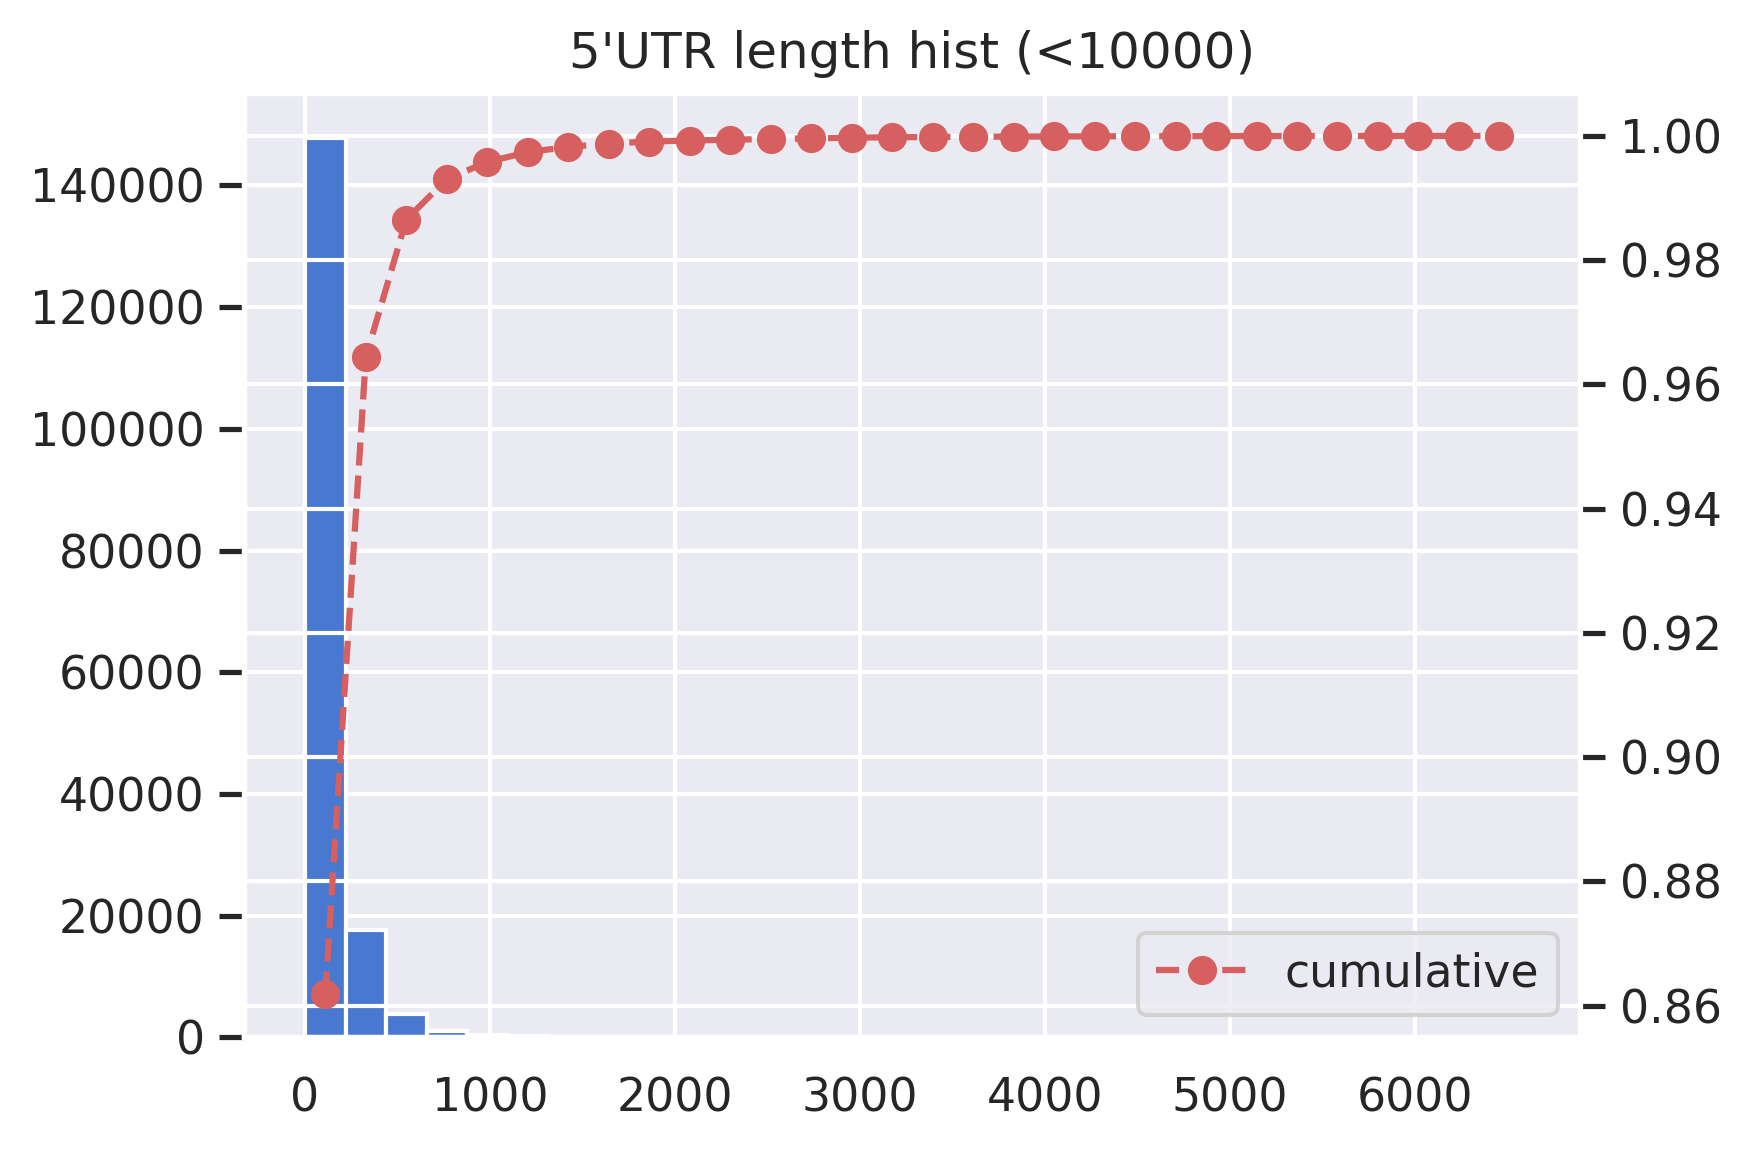

In [16]:
fig,ax1 = plt.subplots()
utr_short = fives[fives["Length"]<10000]
maxlen = utr_df["Length"].max()
minlen = utr_df["Length"].min()
mean = utr_df["Length"].mean()
ax1.set_title("5'UTR length hist (<10000)")
n,bins,patches = plt.hist(utr_short["Length"].values,bins=30)

y2 = np.add.accumulate(n) / n.sum()
x2 = np.convolve(bins, np.ones(2) / 2, mode="same")[1:]

ax2 = ax1.twinx()
lines = ax2.plot(x2,y2,ls="--",color="r",marker="o",label="cumulative")
#plt.text(800,50000,f"min={minlen}\nmax={maxlen}\nmean={mean:.2f}")
plt.legend()
plt.tight_layout()
plt.savefig("5'UTR_length_hist_under10000_cum",facecolor="white")
plt.show()
#ax.set_xscale("log")